# 1. Setup

## 1.1 Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

  Using cached tensorflow-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
  Using cached tensorflow_gpu-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
  Using cached opencv_python-4.5.3.56-cp37-cp37m-win_amd64.whl (34.9 MB)
  Using cached matplotlib-3.4.3-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached h5py-2.10.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached protobuf-3.17.3-cp37-cp37m-win_amd64.whl (909 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462

## 1.2 Import Dependencies

In [18]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3 Set GPU Growth

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4 Create Folder Structures

In [20]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [21]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

# 2. Collect Positives and Anchors

## 2.1 Untar Labelled Faces in the Wild Dataset

In [1]:
# http://vis-www.cs.umass.edu/lfw/

In [2]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [22]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## 2.2 Collect Positive and Anchor Classes

In [23]:
# Import uuid library to generate unique image names
import uuid

In [24]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\a5592771-4e92-11ef-99f8-04cf4bb340cf.jpg'

In [44]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [25]:
plt.imshow(frame[120:120+250,200:200+250, :])

NameError: name 'frame' is not defined

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [26]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [27]:
dir_test = anchor.as_numpy_iterator()

In [28]:
print(dir_test.next())

b'data\\anchor\\624a0d4d-4dd5-11ef-a9dd-04cf4bb340cf.jpg'


## 3.2 Preprocessing - Scale and Resize

In [29]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [51]:
img = preprocess('data\\anchor\\a4e73462-135f-11ec-9e6e-a0cec8d2d278.jpg')

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: data\anchor\a4e73462-135f-11ec-9e6e-a0cec8d2d278.jpg : The system cannot find the file specified.
; No such file or directory [Op:ReadFile]

In [30]:
img.numpy().max() 

NameError: name 'img' is not defined

In [53]:
plt.imshow(img)

NameError: name 'img' is not defined

In [54]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

## 3.3 Create Labelled Dataset

In [8]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [31]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [32]:
samples = data.as_numpy_iterator()

In [33]:
exampple = samples.next()

In [34]:
exampple

(b'data\\anchor\\c1989729-4e5a-11ef-9f62-04cf4bb340cf.jpg',
 b'data\\positive\\f756d8b6-4e5a-11ef-bdf0-04cf4bb340cf.jpg',
 1.0)

## 3.4 Build Train and Test Partition

In [35]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [36]:
res = preprocess_twin(*exampple)

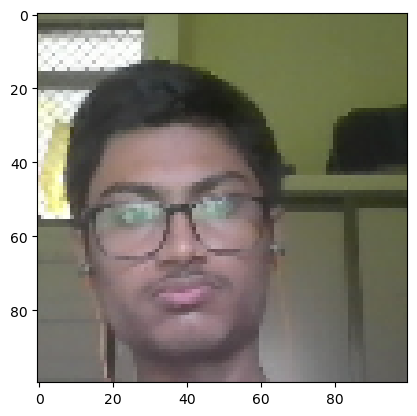

In [37]:
plt.imshow(res[1])

In [38]:
res[2]

1.0

In [39]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [40]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [41]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [42]:
inp = Input(shape=(100,100,3))

In [43]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [44]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [45]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [46]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [47]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [48]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [49]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [51]:
embedding = make_embedding()

In [52]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 Build Distance Layer

In [53]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        if not isinstance(input_embedding, tf.Tensor):
            input_embedding = tf.convert_to_tensor(input_embedding)
        if not isinstance(validation_embedding, tf.Tensor):
            validation_embedding = tf.convert_to_tensor(validation_embedding)
        return tf.math.abs(input_embedding - validation_embedding)

In [54]:
l1 = L1Dist()

In [55]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

## 4.3 Make Siamese Model

In [56]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [57]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [58]:
siamese_layer = L1Dist()

In [59]:
distances = siamese_layer(inp_embedding, val_embedding)

In [60]:
classifier = Dense(1, activation='sigmoid')(distances)

In [63]:
classifier

<KerasTensor shape=(1, None, 1), dtype=float32, sparse=False, name=keras_tensor_55>

In [64]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [65]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_3 (L1Dist)  │ (1, None, 4096)   │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (1, None, 1)      │      4,097 │ l1_dist_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [67]:
siamese_model = make_siamese_model()

In [68]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_4 (L1Dist)  │ (1, None, 4096)   │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (1, None, 1)      │      4,097 │ l1_dist_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Training

## 5.1 Setup Loss and Optimizer

In [69]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [70]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [71]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

In [72]:
test_batch = train_data.as_numpy_iterator()

In [73]:
batch_1 = test_batch.next()

In [74]:
X = batch_1[:2]

In [75]:
y = batch_1[2]

In [76]:
y

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [79]:
tf.losses.BinaryCrossentropy??

In [77]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = tf.squeeze(siamese_model(X, training=True))
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

## 5.4 Build Training Loop

In [78]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the model

In [79]:
EPOCHS = 50

In [101]:
train(train_data, EPOCHS)


 Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step

 Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step

 Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step

 Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step

 Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step

 Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step

 Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step

 Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step

 Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step

 Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step

 Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step

 Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step

 Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step

 Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step

 Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step

 Epoch 16/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step

 Epoch 17/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step

 Epoch 18/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step

 Epoch 19/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step

 

# 6. Evaluate Model

## 6.1 Import Metrics

In [102]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [103]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [104]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


array([[[6.0151471e-08],
        [9.9972159e-01],
        [1.0000000e+00],
        [9.9999827e-01],
        [9.9999756e-01],
        [9.9999893e-01],
        [9.9844855e-01],
        [9.9965972e-01],
        [1.0000000e+00],
        [8.5667506e-07],
        [1.0000000e+00],
        [9.9999762e-01],
        [2.0937532e-06],
        [1.0000000e+00],
        [1.0748618e-05],
        [1.0000000e+00]]], dtype=float32)

In [105]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat.squeeze() ]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]

In [106]:
y_true

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

## 6.3 Calculate Metrics

In [107]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [108]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

## 6.4 Viz Results

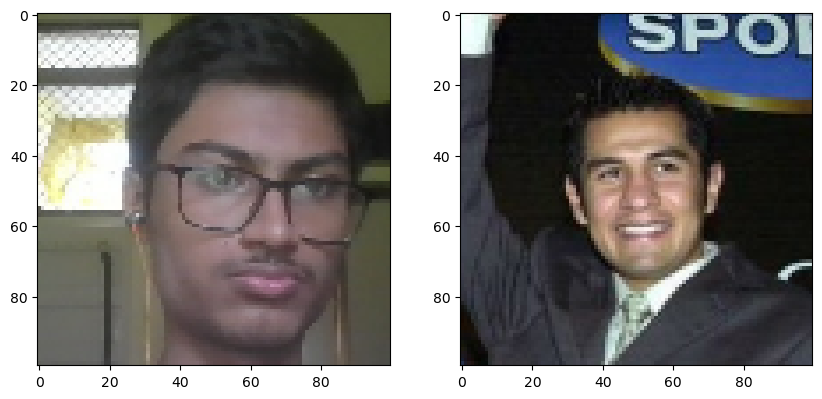

In [109]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

# 7. Save Model

In [110]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [111]:
L1Dist

__main__.L1Dist

In [168]:
get_custom_objects().update({'L1Dist': L1Dist})

In [112]:
# Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [113]:
model.compile(optimizer=opt, loss=tf.losses.BinaryCrossentropy())

In [114]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step


array([[[6.0151471e-08],
        [9.9972159e-01],
        [1.0000000e+00],
        [9.9999827e-01],
        [9.9999756e-01],
        [9.9999893e-01],
        [9.9844855e-01],
        [9.9965972e-01],
        [1.0000000e+00],
        [8.5667506e-07],
        [1.0000000e+00],
        [9.9999762e-01],
        [2.0937532e-06],
        [1.0000000e+00],
        [1.0748618e-05],
        [1.0000000e+00]]], dtype=float32)

In [115]:
# View model summary
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_6 (L1Dist)  │ (1, None, 4096)   │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (1, None, 1)      │      4,097 │ l1_dist_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 116,893,637 (445.91 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,929,092 (297.28 MB)

# 8. Real Time Test

## 8.1 Verification Function

In [ ]:
application_data\verification_images

In [116]:
os.listdir(os.path.join('application_data', 'verification_images'))

['69bdb337-4dd5-11ef-ad31-04cf4bb340cf.jpg',
 '6a77b1a5-4dd5-11ef-ae8b-04cf4bb340cf.jpg',
 '6ae2aa97-4dd5-11ef-9216-04cf4bb340cf.jpg',
 '6bc395fb-4dd5-11ef-ac2d-04cf4bb340cf.jpg',
 '6d054ce6-4dd5-11ef-9e7b-04cf4bb340cf.jpg',
 '6d9377bd-4dd5-11ef-bd0d-04cf4bb340cf.jpg',
 '6dafb082-4dd5-11ef-8b4a-04cf4bb340cf.jpg',
 '6e368fc6-4dd5-11ef-ae6b-04cf4bb340cf.jpg',
 '6e789247-4dd5-11ef-a525-04cf4bb340cf.jpg',
 '6ea91802-4dd5-11ef-8785-04cf4bb340cf.jpg',
 '6eff86a8-4dd5-11ef-b542-04cf4bb340cf.jpg',
 '7adb9143-4e5a-11ef-89a6-04cf4bb340cf.jpg',
 '7bc7d638-4e5a-11ef-bb71-04cf4bb340cf.jpg',
 '7c95e222-4e5a-11ef-9fb3-04cf4bb340cf.jpg',
 '7cc126ac-4e5a-11ef-86b7-04cf4bb340cf.jpg',
 '7d26d96a-4e5a-11ef-8ad9-04cf4bb340cf.jpg',
 '7d8dce48-4e5a-11ef-9339-04cf4bb340cf.jpg',
 '7dc1deaa-4e5a-11ef-8450-04cf4bb340cf.jpg',
 '7df104cd-4e5a-11ef-8600-04cf4bb340cf.jpg',
 '7e0a826c-4e5a-11ef-bb61-04cf4bb340cf.jpg',
 '7e52f240-4e5a-11ef-b978-04cf4bb340cf.jpg',
 '7e6c7859-4e5a-11ef-892d-04cf4bb340cf.jpg',
 '7eb8ad5e

In [117]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [118]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\69bdb337-4dd5-11ef-ad31-04cf4bb340cf.jpg
application_data\verification_images\6a77b1a5-4dd5-11ef-ae8b-04cf4bb340cf.jpg
application_data\verification_images\6ae2aa97-4dd5-11ef-9216-04cf4bb340cf.jpg
application_data\verification_images\6bc395fb-4dd5-11ef-ac2d-04cf4bb340cf.jpg
application_data\verification_images\6d054ce6-4dd5-11ef-9e7b-04cf4bb340cf.jpg
application_data\verification_images\6d9377bd-4dd5-11ef-bd0d-04cf4bb340cf.jpg
application_data\verification_images\6dafb082-4dd5-11ef-8b4a-04cf4bb340cf.jpg
application_data\verification_images\6e368fc6-4dd5-11ef-ae6b-04cf4bb340cf.jpg
application_data\verification_images\6e789247-4dd5-11ef-a525-04cf4bb340cf.jpg
application_data\verification_images\6ea91802-4dd5-11ef-8785-04cf4bb340cf.jpg
application_data\verification_images\6eff86a8-4dd5-11ef-b542-04cf4bb340cf.jpg
application_data\verification_images\7adb9143-4e5a-11ef-89a6-04cf4bb340cf.jpg
application_data\verification_images\7bc7d638-4e5a-11ef-bb71-04c

In [119]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time Verification

In [120]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━


 Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step

 Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step

 Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 18/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 19/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step

 Epoch 20/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1

In [146]:
np.sum(np.squeeze(results) > 0.9)

32

In [147]:
32/50

0.64